## Queremos ser capaces de clasificar casas según la región en la que se encuentren y del ingreso medio. Para ello, utilizaremos el famoso conjunto de datos California Housing. Se construyó utilizando los datos del censo de California de 1990. Contiene una fila por grupo de bloques censales. Un grupo de bloques es la unidad geográfica más pequeña para la que se publican datos del censo de USA.

## Realizamos : 
- Importación de librerias.
- Lectura de datos.
- Verificación de la informacion y valores faltantes o duplicados.

In [110]:
import pandas as pd 
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
import warnings
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [111]:
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")

In [112]:
data.shape

(20640, 9)

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [114]:
data.duplicated().sum()

0

In [115]:
data.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [116]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.33,41.00,6.98,1.02,322.00,2.56,37.88,-122.23,4.53
1,8.30,21.00,6.24,0.97,2401.00,2.11,37.86,-122.22,3.58
2,7.26,52.00,8.29,1.07,496.00,2.80,37.85,-122.24,3.52
3,5.64,52.00,5.82,1.07,558.00,2.55,37.85,-122.25,3.41
4,3.85,52.00,6.28,1.08,565.00,2.18,37.85,-122.25,3.42


### Determinamos que las columnas de mayor interes son 3.
realizaremos:
- Selección de variables.
- Aplicamos el modelo Kmeans, para separar los datos en 6 grupos y asi poder tenerlos separados por caracteristicas similares.
- División de los datos para grupo de entrenamiento y prueba.
- Transformación de datos.
- Generamos graficos para visualizar el desempeño.


In [117]:
data_pr = data[['Latitude' , 'Longitude' , 'MedInc']]
modelo = KMeans(n_clusters = 6, n_init = 10, random_state = 42)
modelo.fit(data_pr)
data_pr['cluster'] = list(modelo.labels_)

In [118]:
X = data_pr.drop(['cluster'], axis=1)
y = data_pr['cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

#### Realizamos grafica de diagramas de puntos y asi visualizar como se distribuyen los datos por el conjunto de datos de prueba y entrenamiento.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

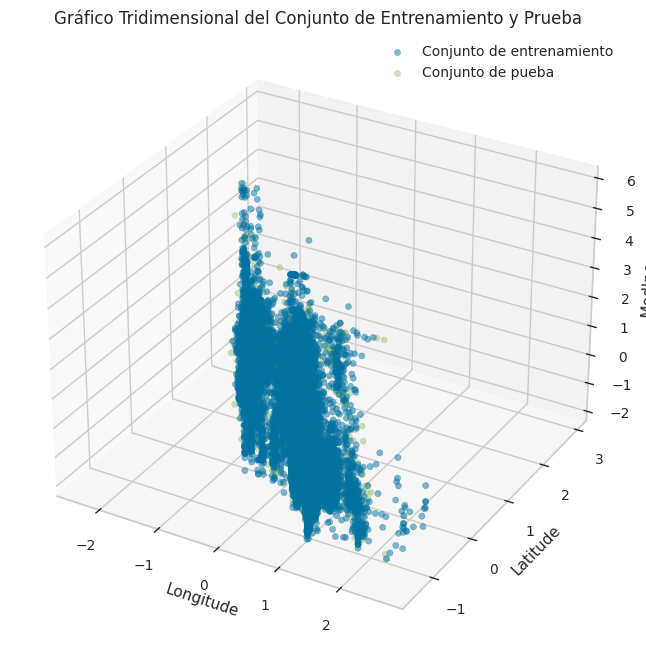

In [120]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Supongamos que tienes los conjuntos de entrenamiento y prueba escalados (X_train_sc, X_test_sc)

# Crear un gráfico tridimensional para el conjunto de entrenamiento
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_sc['Longitude'], X_train_sc['Latitude'], X_train_sc['MedInc'], label='Conjunto de entrenamiento', alpha=0.5)

# Agregar un gráfico tridimensional para el conjunto de prueba
ax.scatter(X_test_sc['Longitude'], X_test_sc['Latitude'], X_test_sc['MedInc'], label='Conjunto de pueba', alpha=0.5)

# Personalizar el gráfico
ax.set_title('Gráfico Tridimensional del Conjunto de Entrenamiento y Prueba')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('MedInc')
ax.legend()
plt.show()


Efectivamente presentan valores similares, por lo que procedemos a verificar con un modelo de verificacion supervisada.

In [121]:
modelo_sup = RandomForestClassifier(n_estimators= 100, random_state=42)

modelo_sup.fit(X_train_sc,y_train)

predictions = modelo_sup.predict(X_test_sc)

In [122]:
predictions = modelo_sup.predict(X_test_sc)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       953
           1       1.00      1.00      1.00      1467
           2       0.98      1.00      0.99        91
           3       0.99      0.99      0.99       753
           4       1.00      0.99      0.99       338
           5       1.00      1.00      1.00       526

    accuracy                           1.00      4128
   macro avg       0.99      1.00      0.99      4128
weighted avg       1.00      1.00      1.00      4128



### Conclusiones:

    Dado el alto nivel de efectividad que demuestra el modelo, procedi a verificar que estuviese separada la informacion y que no tuviese informacion, lo cual efectivamente era asi,
    pero luego de separarlos de manera correcta sigue demostrando un sobreajuste. ya que el nivel de presición es muy elevado. 